<a href="https://colab.research.google.com/github/Adi161201/EDA-of-titanic-dataset/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complete EDA of Titanic Dataset**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

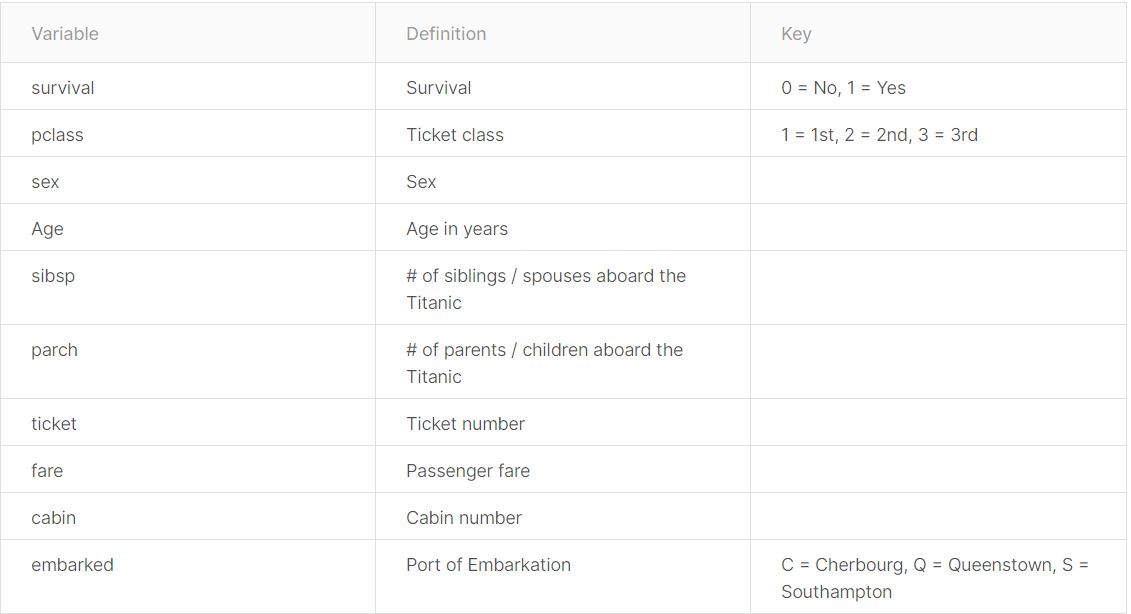

# Importing Dataset And Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from plotly.offline import iplot
import plotly as py

import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.io as pio
pio.renderers

pio.renderers.default='colab'

In [ ]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Heatmap

In [ ]:
plt.style.use('ggplot')

In [ ]:
titanic.isnull().sum()    # columns containing null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Mostly empty data is in 'age' and 'deck' column. Let's see them with the help of a Heatmap

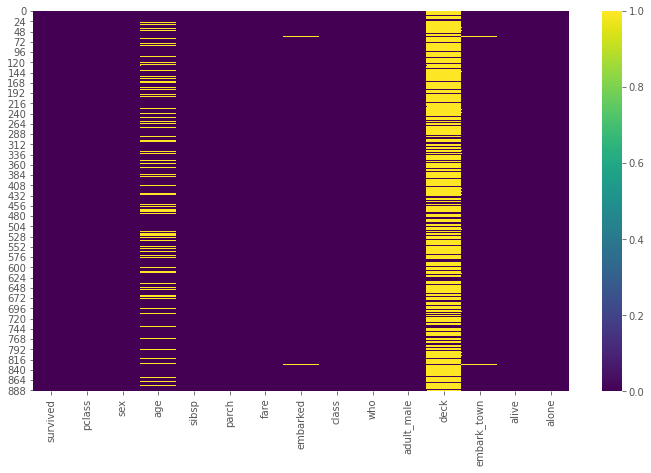

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(titanic.isnull(), cmap='viridis')

Using this plot, it is observed that column 'deck' and 'age' contains most of the null values.

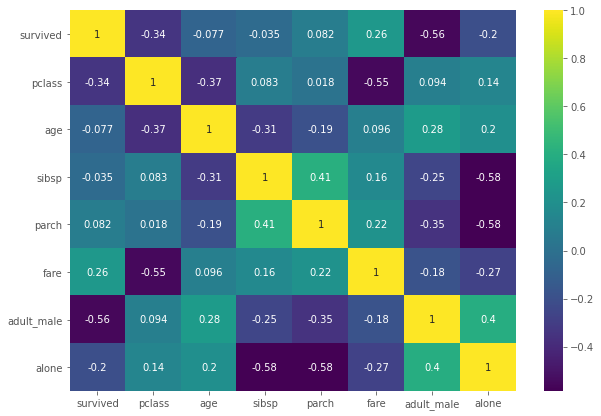

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic.corr() , annot=True, cmap='viridis')

# Univariate Analysis



In [ ]:
cols=list(titanic.columns)
cols

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

# Survived

In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

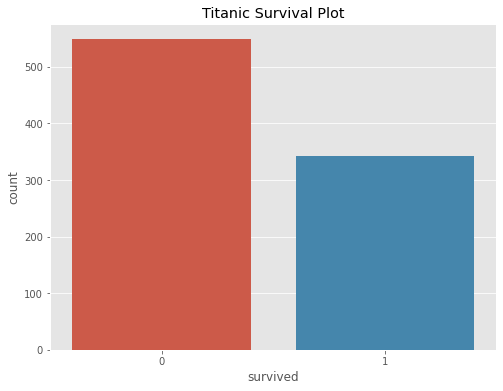

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='survived',data=titanic)
plt.title('Titanic Survival Plot')
plt.show()

In [ ]:
titanic['survived'].value_counts().iplot(kind='bar')

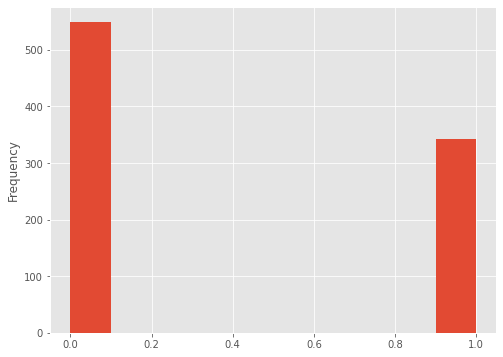

In [ ]:
plt.figure(figsize=(8,6))
titanic['survived'].plot(kind='hist')

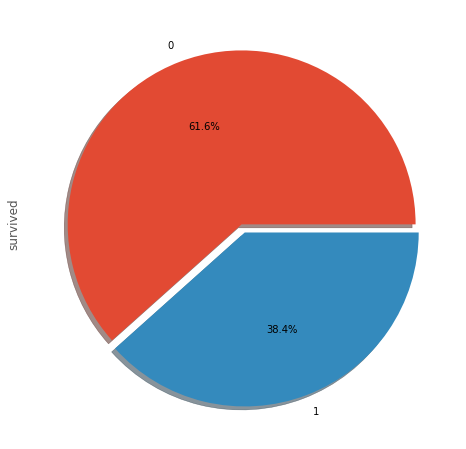

In [ ]:
plt.figure(figsize=(8,8))
titanic['survived'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow=True, explode=[0,0.05])
plt.show()

## survived= 61.6%

# Pclass

In [ ]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

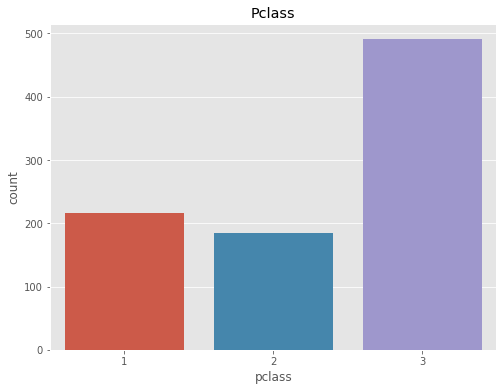

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='pclass',data=titanic)
plt.title('Pclass')
plt.show()

most of the passengers were travelling in pclass 3 > pclass1 > pclass 2.

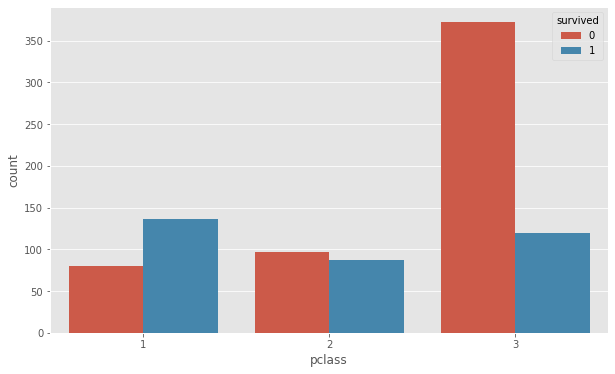

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='pclass',data=titanic, hue='survived')
plt.show()

1. Survival rate was highest in pclass 1. 
2. Death rate was highest in pclass 3

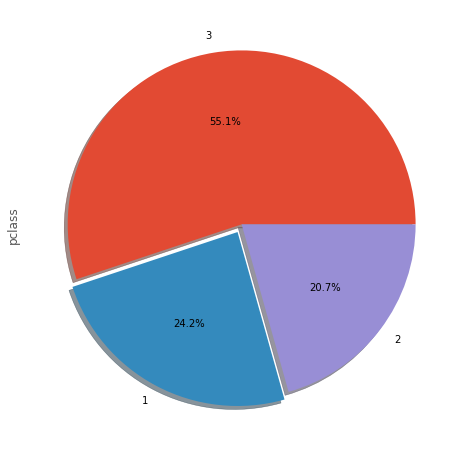

In [ ]:
plt.figure(figsize=(8,8))
titanic['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.05,0],shadow=True)
plt.show()

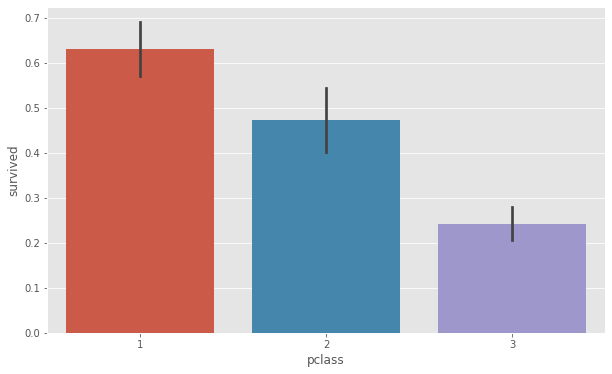

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='pclass', y='survived',data=titanic)
plt.show()

In [ ]:
titanic.iplot(x='pclass', y='survived', kind='bar', colors='green',xTitle='Pclass', yTitle='Survived')
plt.show()

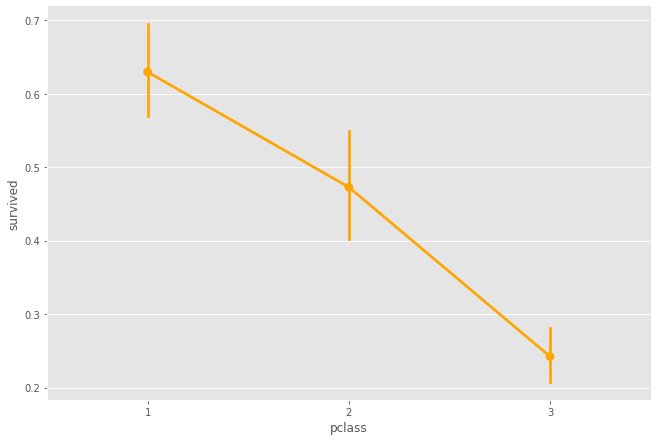

In [ ]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='point', color='orange', height=6, aspect=1.5)
plt.show()

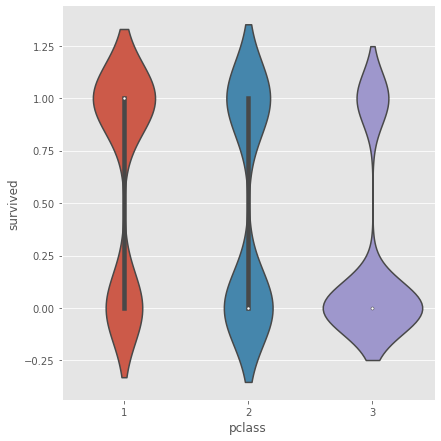

In [ ]:
sns.catplot(x='pclass', y='survived', data=titanic, kind='violin', height=6, aspect=1)
plt.show()

# Sex

In [ ]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

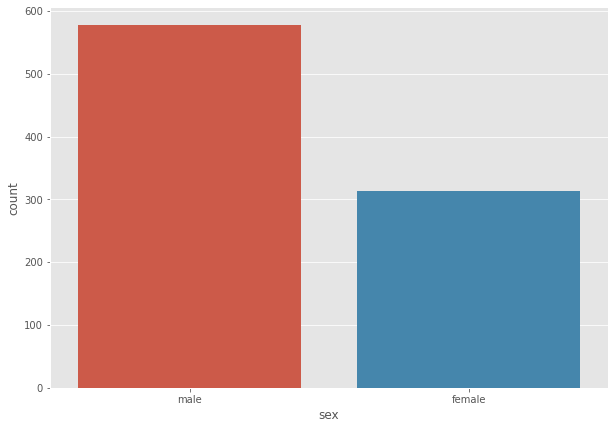

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='sex',data=titanic)
plt.show()

No. of males were more than females.

In [ ]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

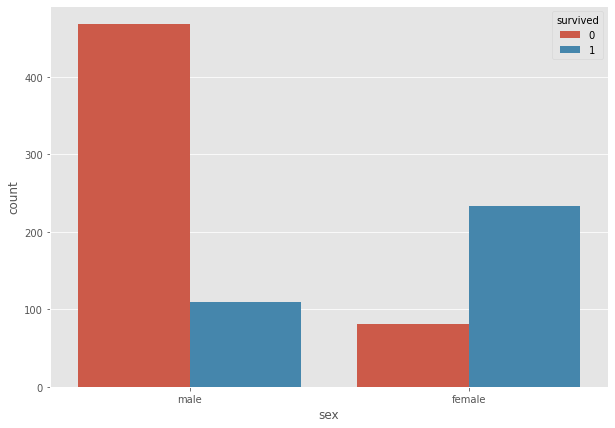

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='sex',data=titanic , hue='survived')
plt.show()

1. survival rate of females > males

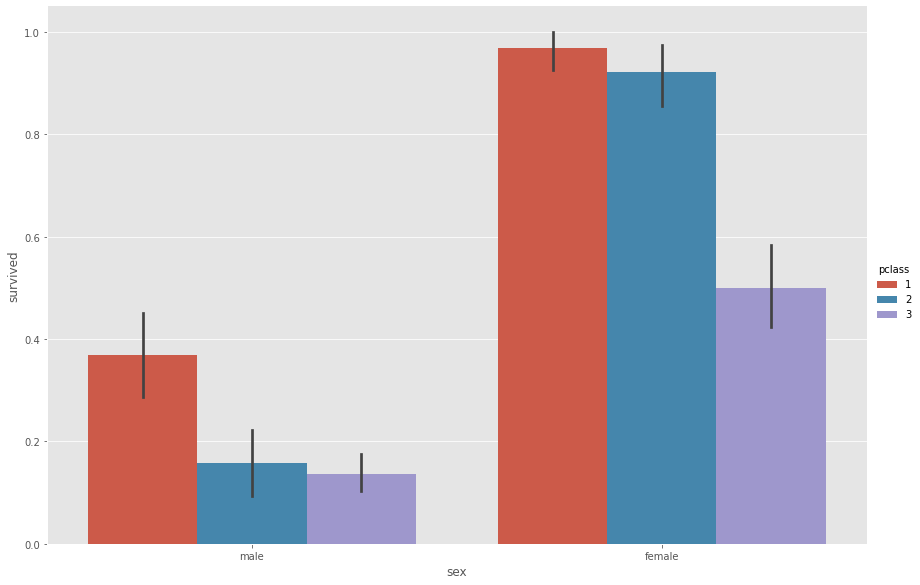

In [ ]:
sns.catplot(x='sex' , y='survived',data=titanic, kind='bar',hue='pclass', height=8, aspect=1.5)
plt.show()

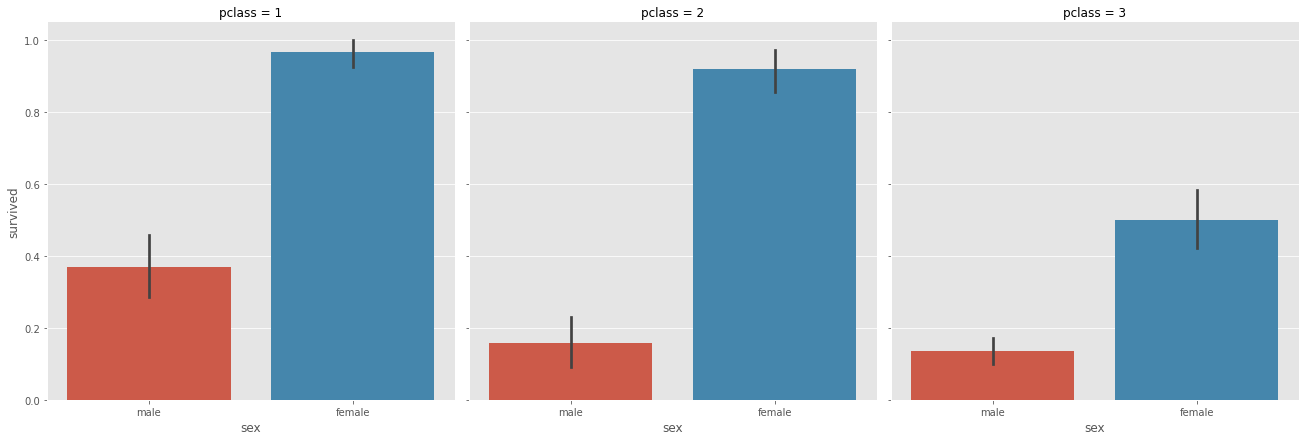

In [ ]:
sns.catplot(x='sex' , y='survived',data=titanic, kind='bar',col='pclass', height=6, aspect=1)
plt.show()

1. Most number of females survived were travelling in pclass1
2. Most number of males survived were also travelling in pclass1

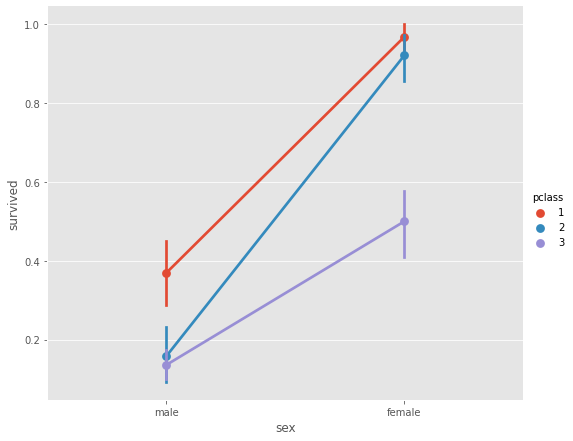

In [ ]:
sns.catplot(x='sex', y='survived',data=titanic, kind='point',hue='pclass',height=6,aspect=1.20)
plt.show()

<Figure size 864x648 with 0 Axes>

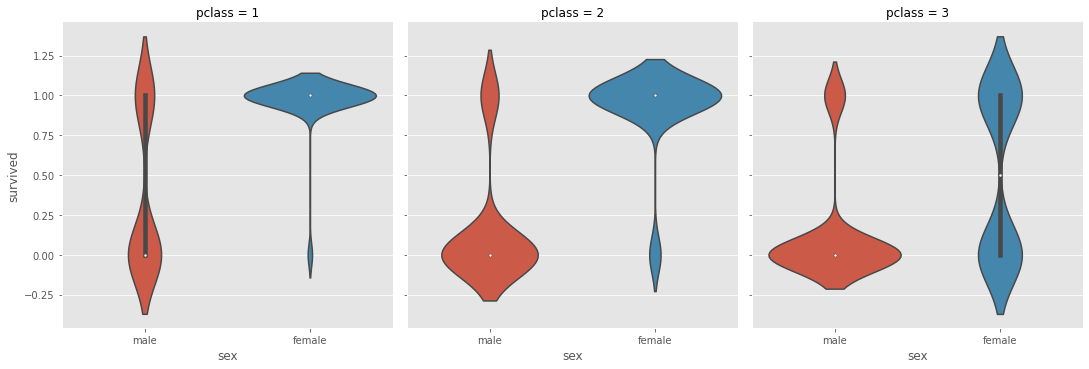

In [ ]:
plt.figure(figsize=(12,9))
sns.catplot(x='sex',y='survived',data=titanic,kind='violin', col='pclass')
plt.show()

# **Age**

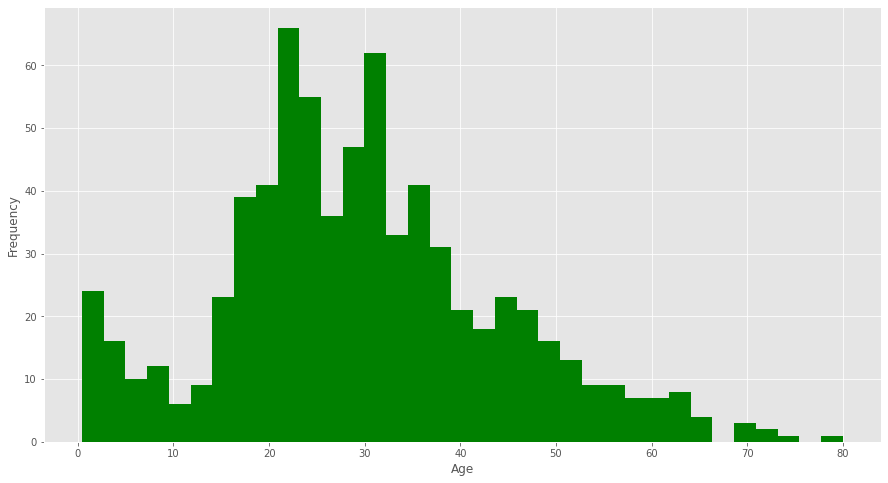

In [ ]:
plt.figure(figsize=(15,8))
titanic['age'].plot(kind='hist', bins=35 , color='green')
plt.xlabel('Age')
plt.show()

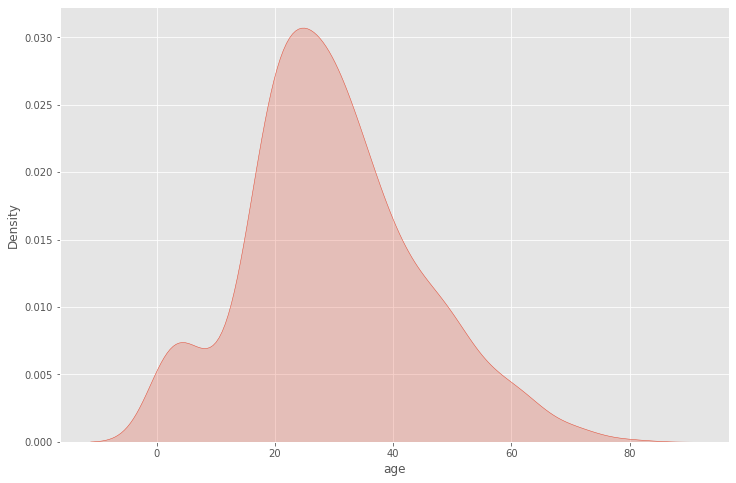

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(titanic['age'], shade=True)
plt.show()

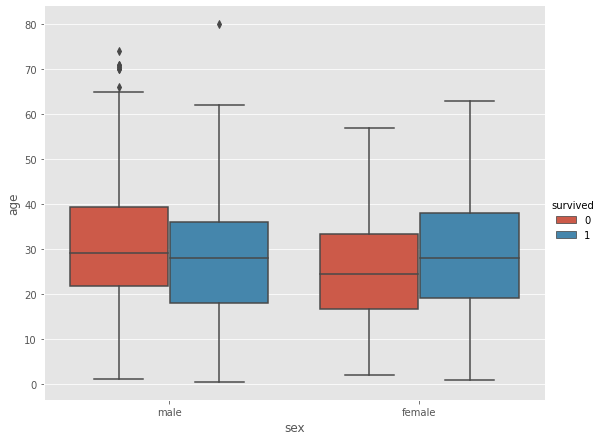

In [ ]:
sns.catplot(x='sex', y='age' ,data=titanic , kind='box' , hue='survived',height=6, aspect=1.25)
plt.show()

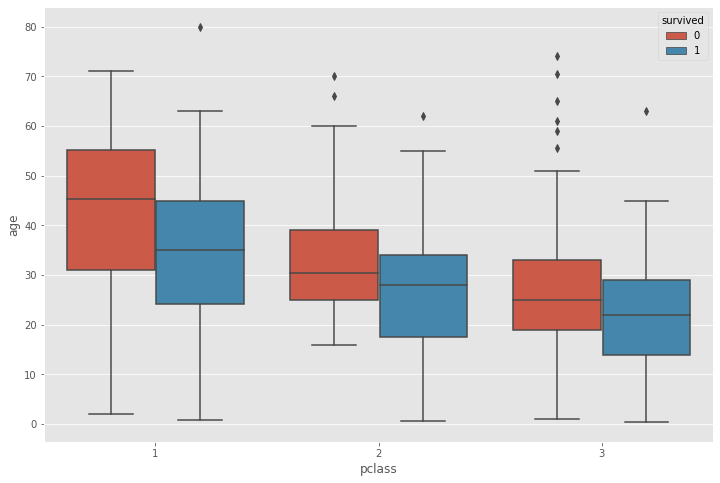

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='pclass' , y='age', data=titanic, hue='survived' )
plt.show()

1. people travelling in pclass1 were of higher age.
2. Survival rate was highest in pclass1.

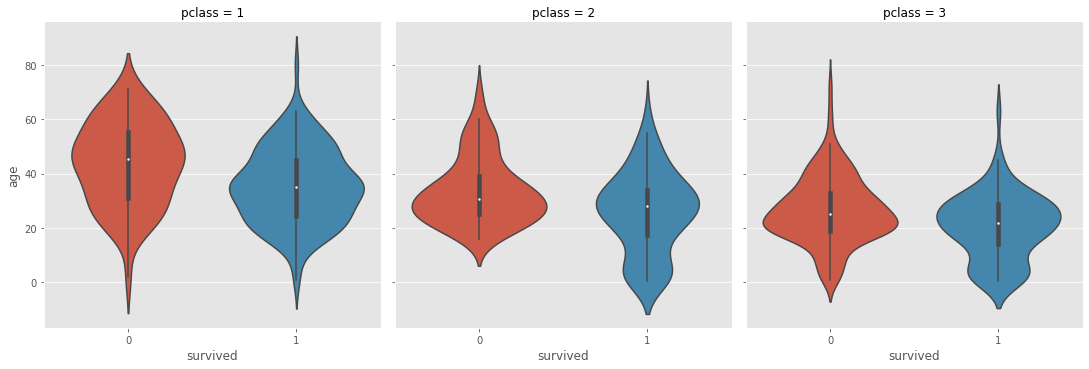

In [ ]:
sns.catplot(kind='violin' , x='survived', y='age',data=titanic , col='pclass')
plt.show()

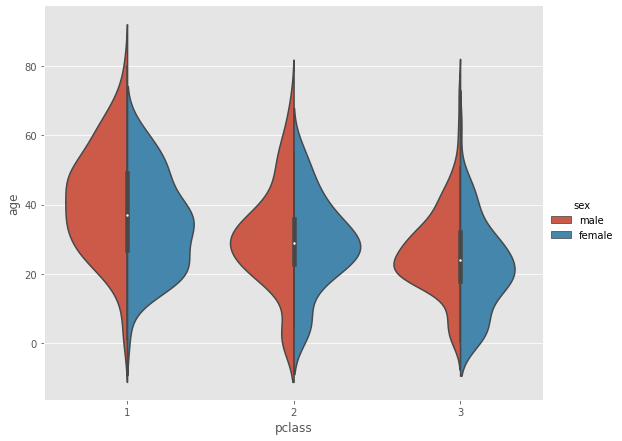

In [ ]:
sns.catplot(kind='violin' , x='pclass', y='age',data=titanic , hue='sex' , split=True , height=6, aspect=1.25)
plt.show()

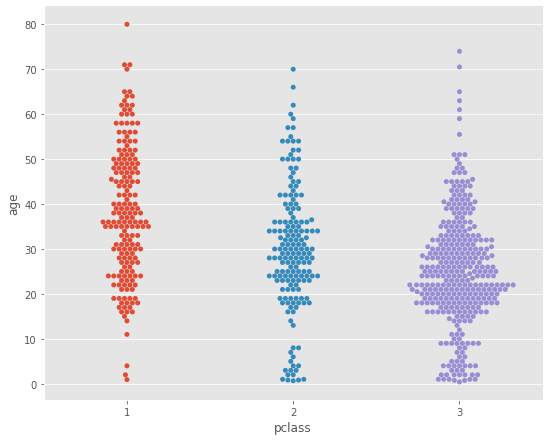

In [ ]:
sns.catplot(x='pclass' , y='age', data=titanic, kind='swarm' ,height=6, aspect=1.25)
plt.show()

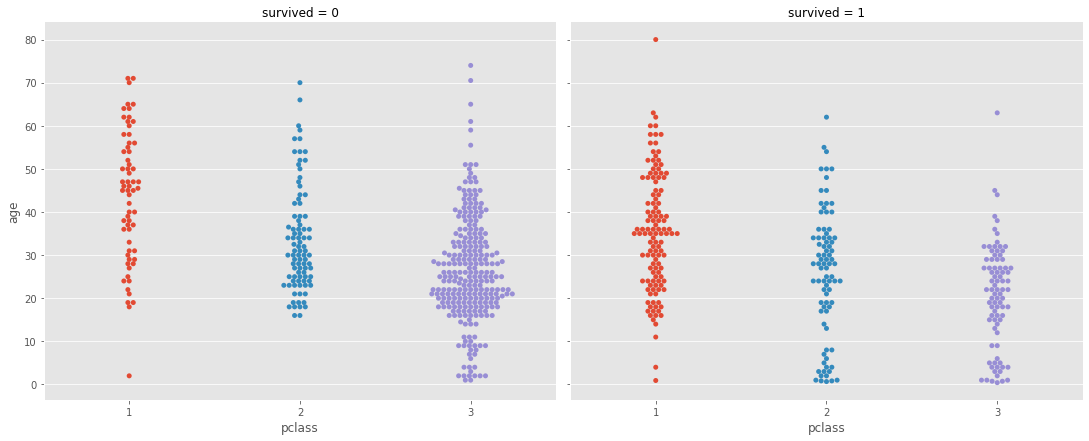

In [ ]:
sns.catplot(x='pclass' , y='age', data=titanic, kind='swarm' ,col='survived' , height=6, aspect=1.25)
plt.show()

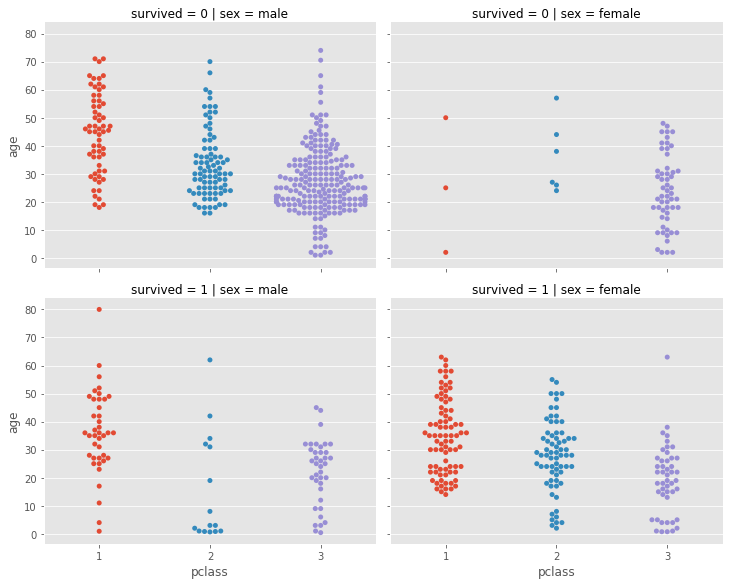

In [ ]:
sns.catplot(x='pclass' , y='age', data=titanic, kind='swarm' ,col='sex' ,row='survived', height=4, aspect=1.25)
plt.show()

# **Fare**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


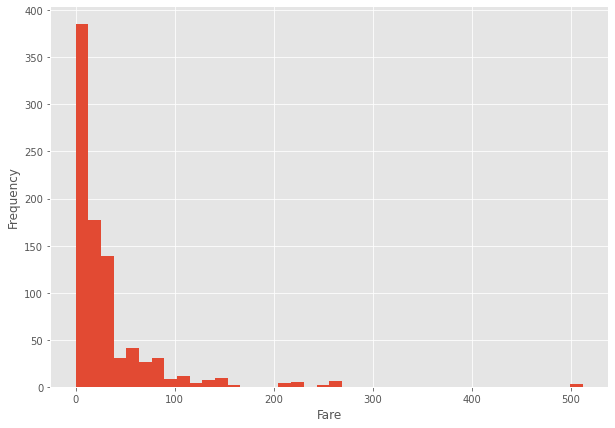

In [ ]:
plt.figure(figsize=(10,7))
titanic['fare'].plot(kind='hist' , bins=40)
plt.xlabel('Fare')
plt.show()

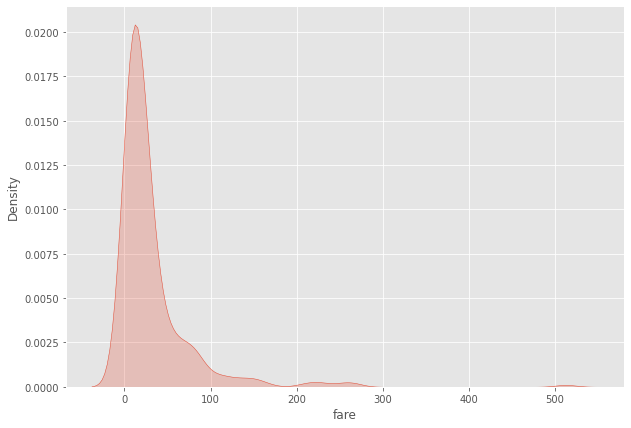

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(titanic['fare'], shade=True)
plt.show()

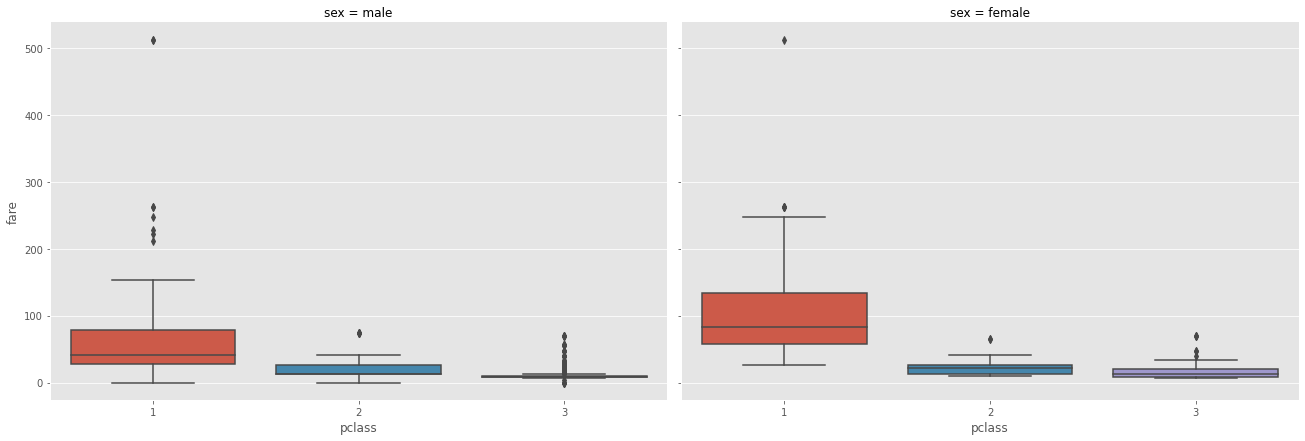

In [ ]:
sns.catplot(x='pclass' , y='fare', data=titanic,kind='box', col='sex' , height=6,aspect=1.5)
plt.show()

1. Fare in pclass1 was higher than rest of the classes.
2. Fare for females in pclass1 were more than of men in same class.

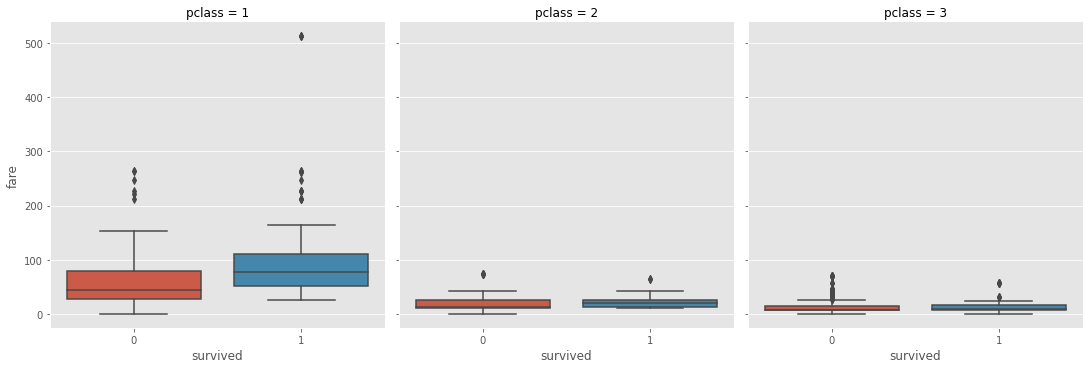

In [ ]:
sns.catplot(x='survived' , y='fare', data=titanic , kind='box' , col='pclass')
plt.show()

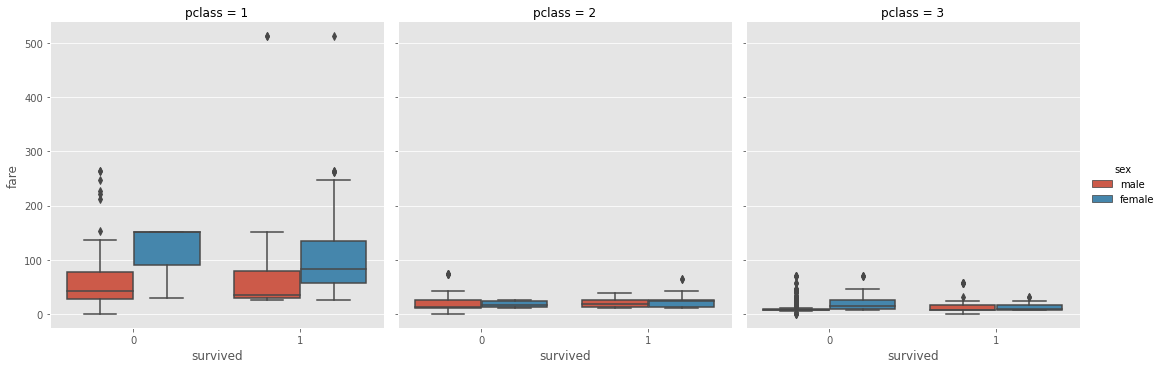

In [ ]:
sns.catplot(x='survived' , y='fare', data=titanic , kind='box' ,hue='sex', col='pclass')
plt.show()

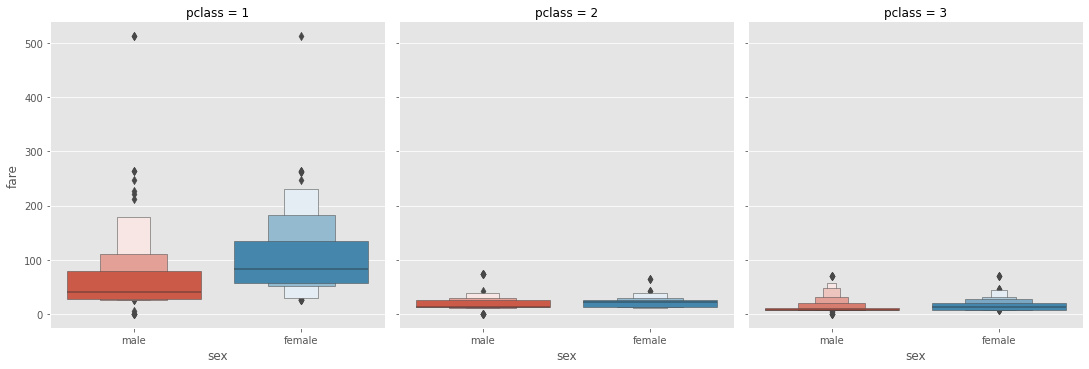

In [ ]:
sns.catplot(x='sex' , y='fare', data=titanic , kind='boxen' , col='pclass')
plt.show()

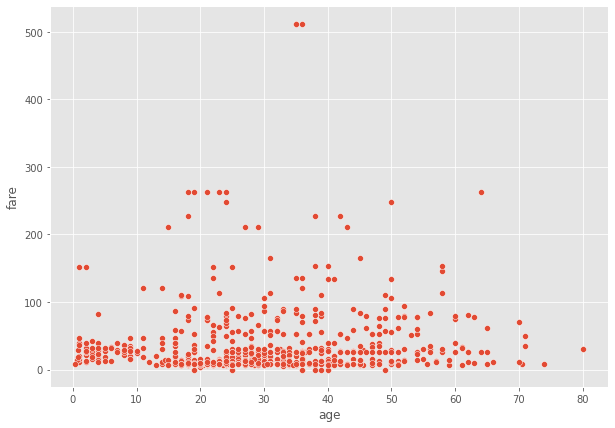

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='age', y='fare',data=titanic)
plt.show()

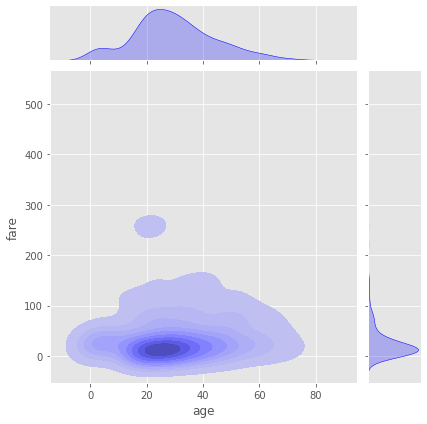

In [ ]:
sns.jointplot(x='age' , y='fare', data=titanic , kind='kde', fill=True , color='blue')
plt.show()

# **Sibsp**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

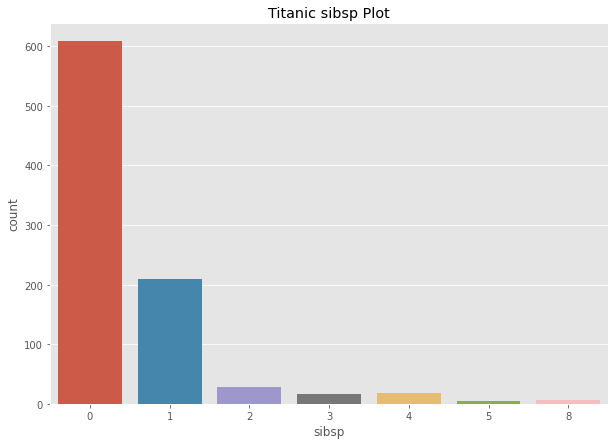

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='sibsp', data=titanic)
plt.title('Titanic sibsp Plot')
plt.show()

Majority of people were travelling alone means without any sibling.

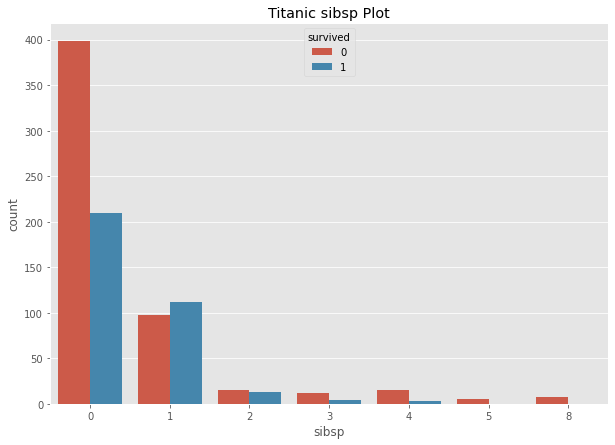

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='sibsp', data=titanic ,hue='survived')
plt.title('Titanic sibsp Plot')
plt.show()

People travelling alone survied the most.

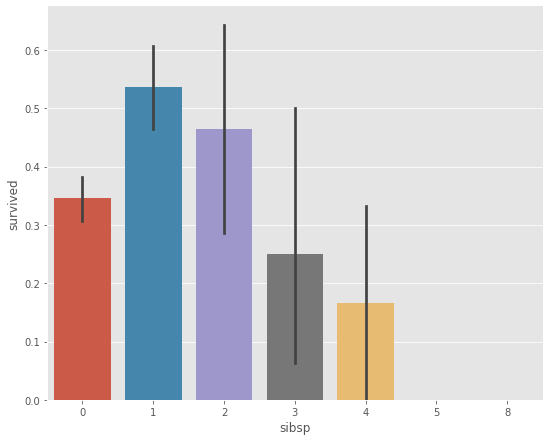

In [ ]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=titanic , height=6, aspect=1.25)
plt.show()

Probability of survival is highest in case of people travelling with one sibling.

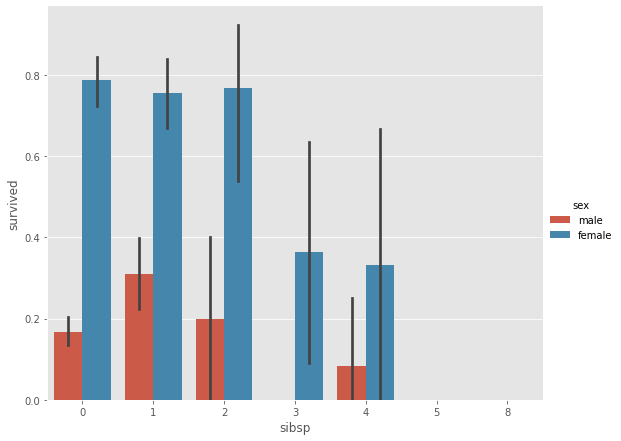

In [ ]:
sns.catplot( x='sibsp', y='survived', kind='bar',hue='sex', data=titanic , height=6, aspect=1.25)
plt.show()

1. Probability of survival was high for females in all cases of siblings.

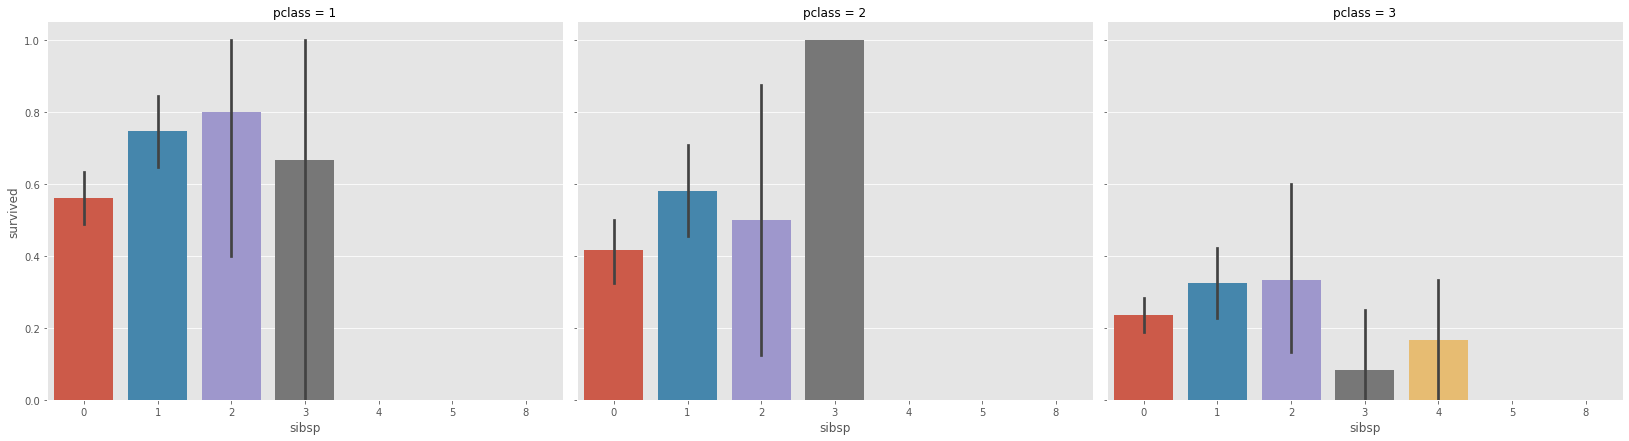

In [ ]:
sns.catplot( x='sibsp', y='survived', kind='bar', data=titanic , col='pclass' ,height=6, aspect=1.25)
plt.show()

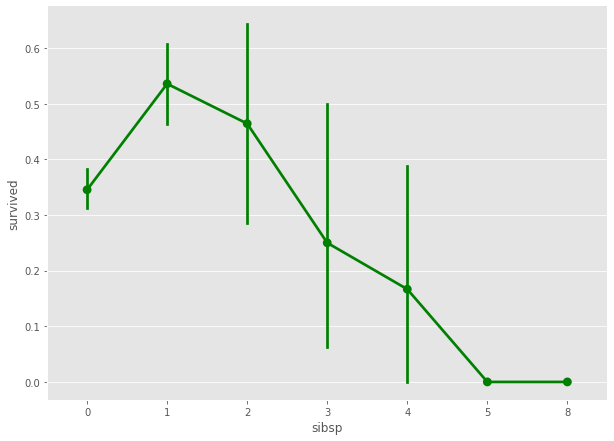

In [ ]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='point', height=6, aspect=1.4, color='green')
plt.show()

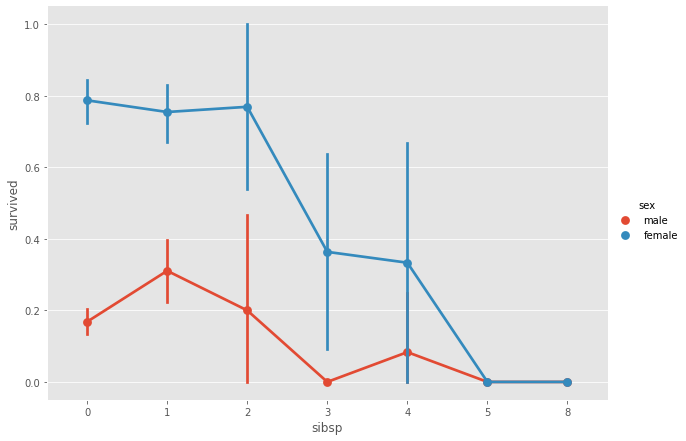

In [ ]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='point',hue='sex', height=6, aspect=1.4)
plt.show()

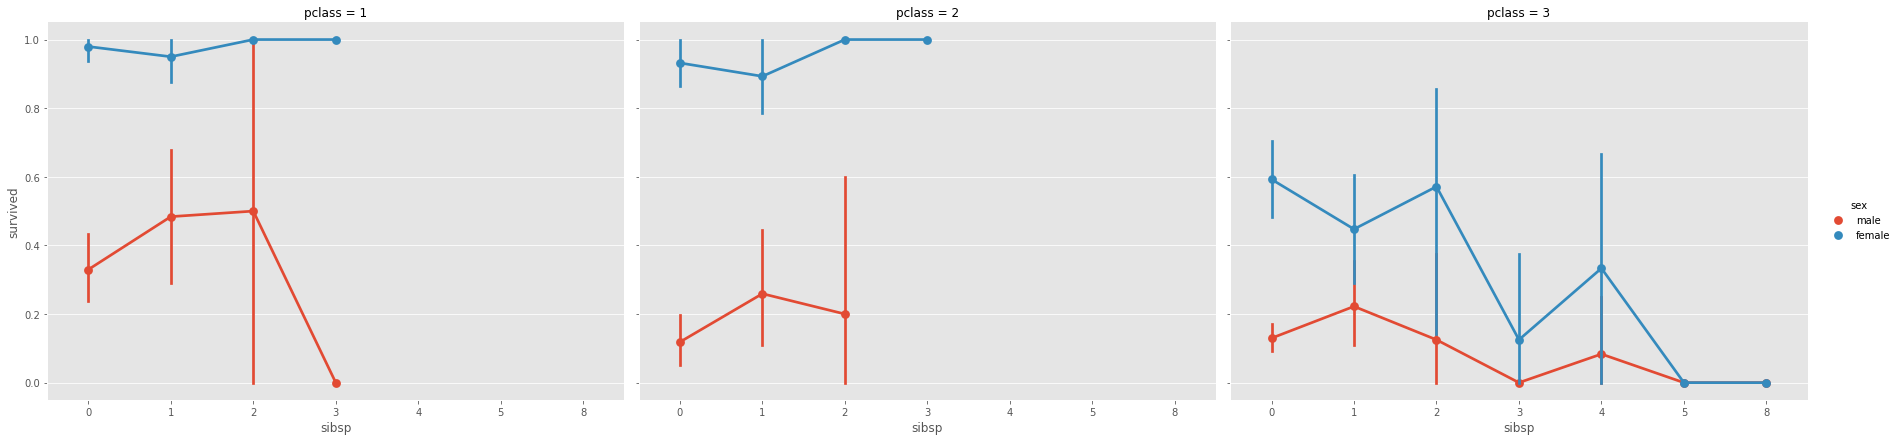

In [ ]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='point',hue='sex',col='pclass',height=6, aspect=1.4)
plt.show()

Probablity of survival pclass1 > pclass 3

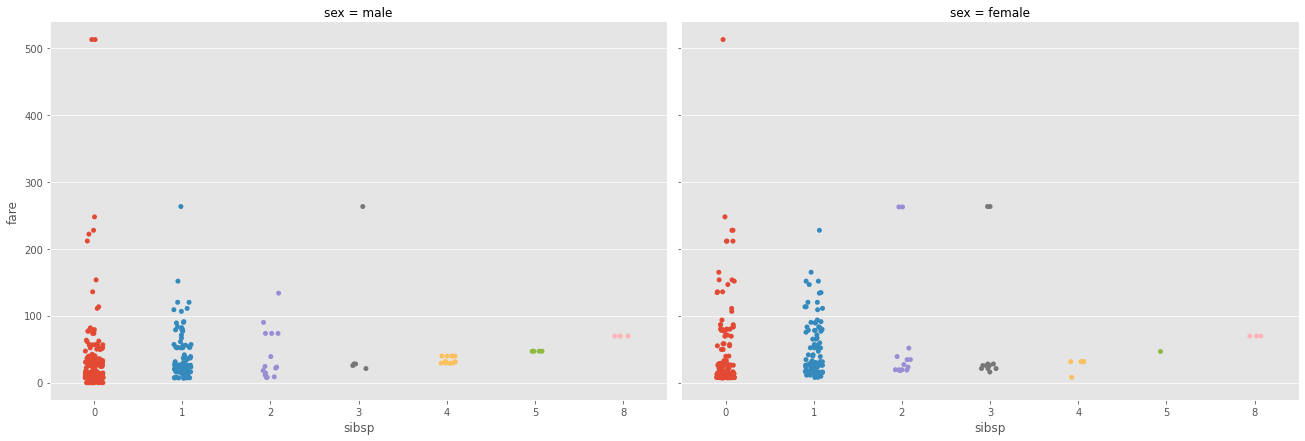

In [ ]:
sns.catplot(x='sibsp', y='fare',data=titanic, kind='strip',col='sex', height=6, aspect=1.5)
plt.show()


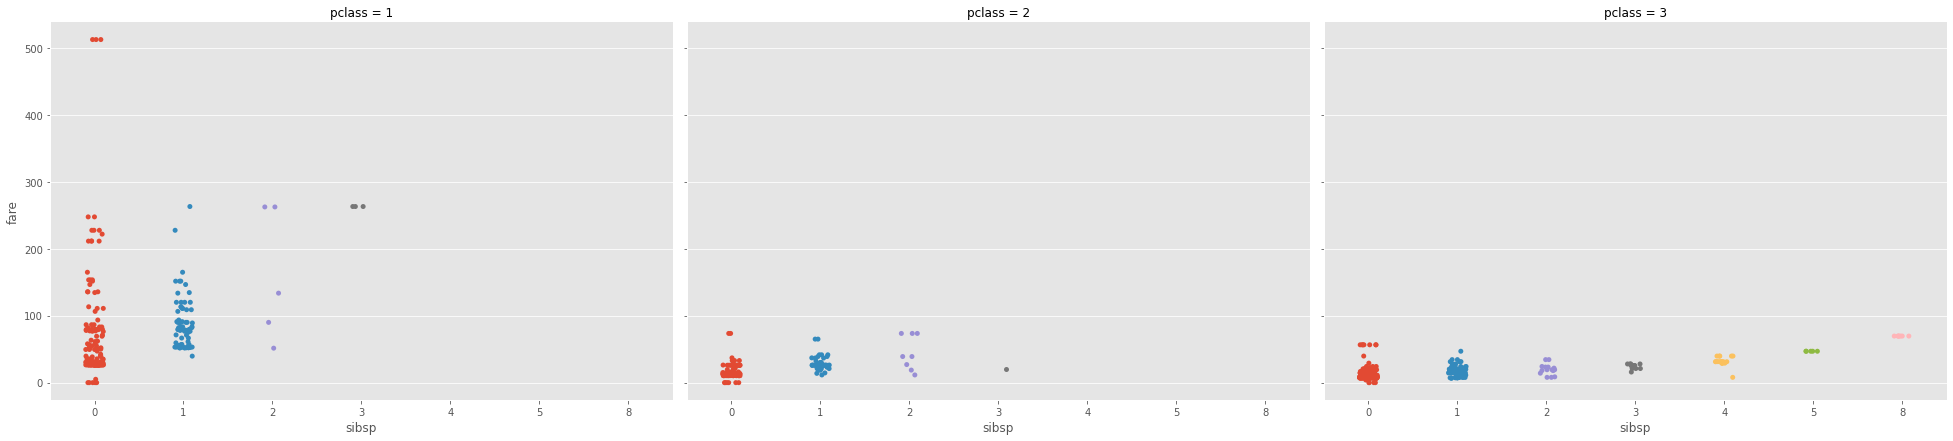

In [ ]:
sns.catplot(x='sibsp', y='fare',data=titanic, kind='strip',col='pclass', height=6, aspect=1.5)
plt.show()


# **Parch**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

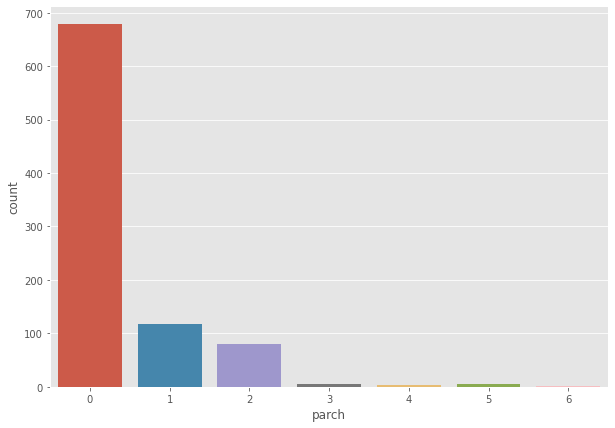

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='parch', data=titanic)
plt.show()

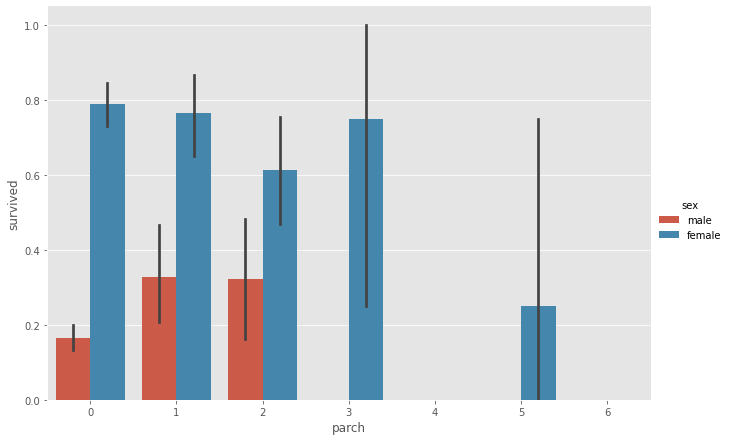

In [ ]:
sns.catplot(x='parch',y='survived', data=titanic, hue='sex', kind='bar', height=6, aspect=1.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



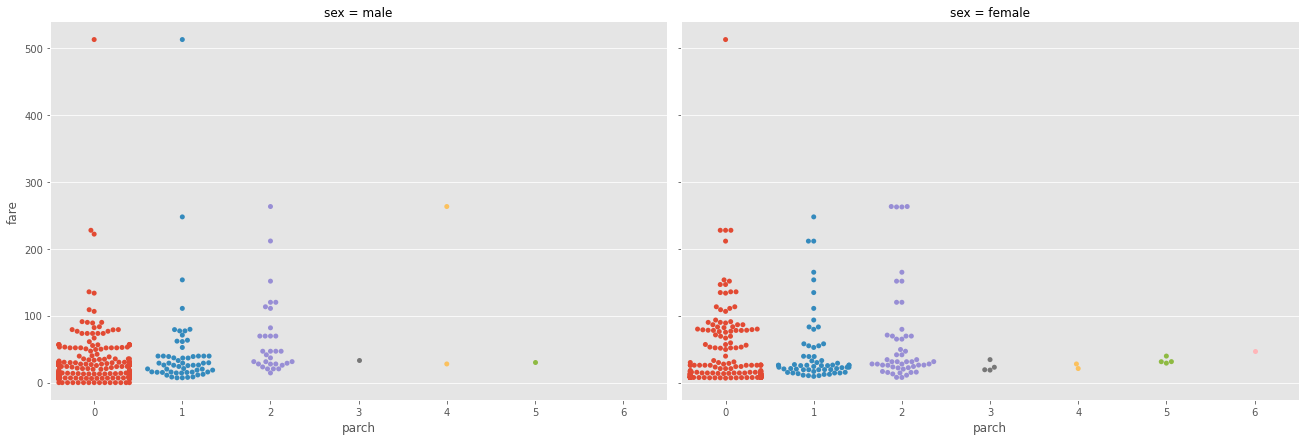

In [ ]:
sns.catplot(x='parch',y='fare', data=titanic, col='sex', kind='swarm', height=6, aspect=1.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



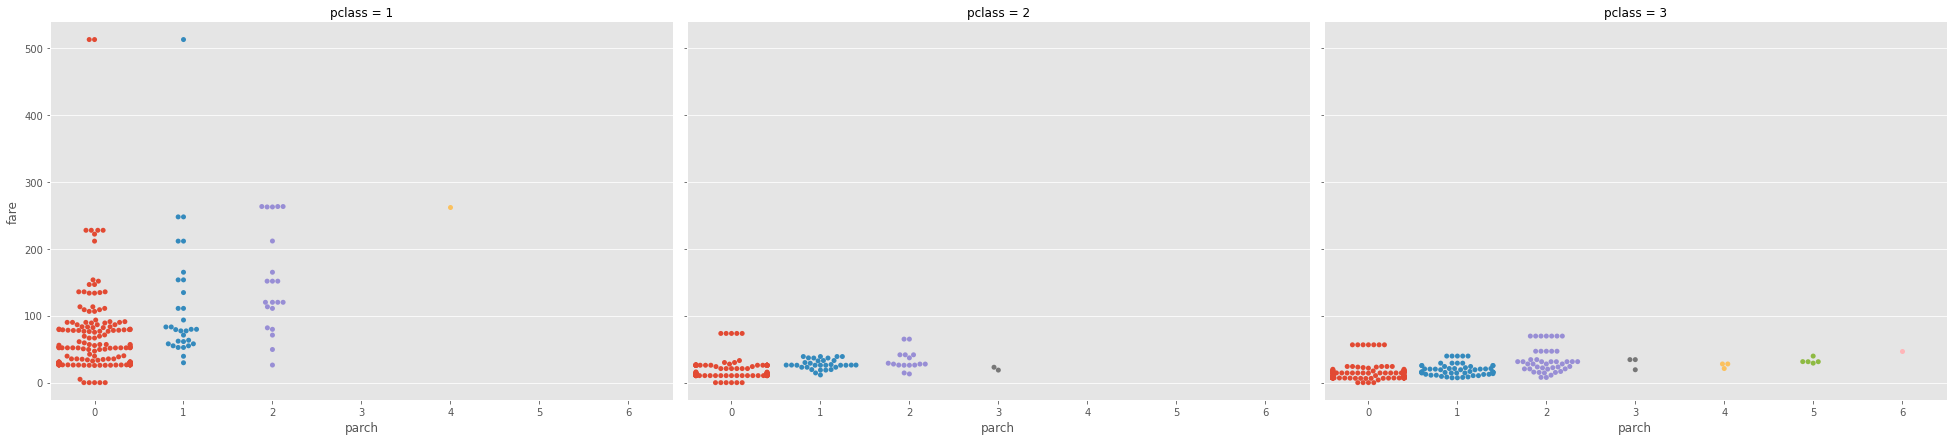

In [ ]:
sns.catplot(x='parch',y='fare', data=titanic, col='pclass', kind='swarm', height=6, aspect=1.5)
plt.show()

# **Embarked**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

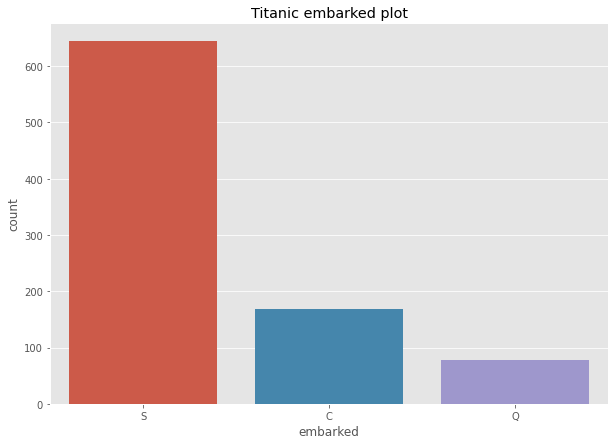

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='embarked' , data=titanic)
plt.title('Titanic embarked plot')
plt.show()

Around 644 people embarked from Southampton.

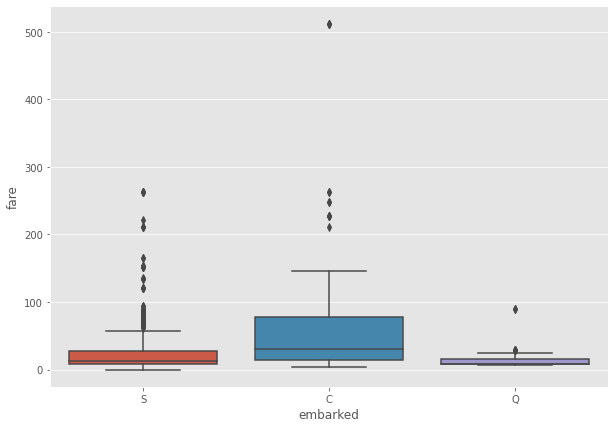

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='embarked', y='fare',data=titanic)
plt.show()

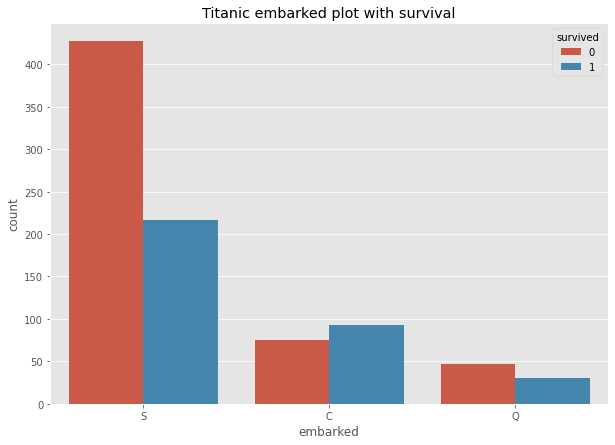

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='embarked' , hue='survived',data=titanic)
plt.title('Titanic embarked plot with survival')
plt.show()

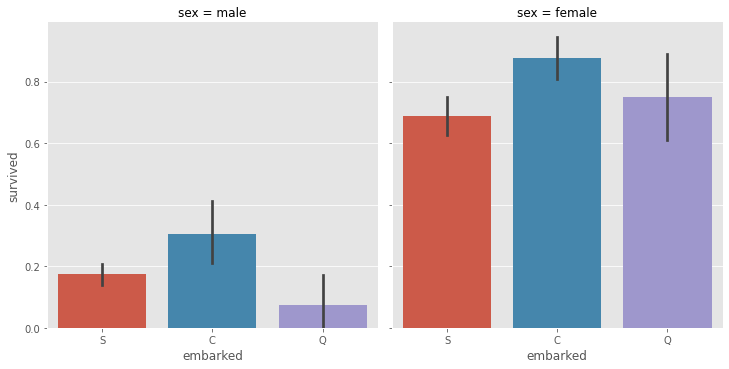

In [ ]:
sns.catplot(x='embarked' ,y='survived', col='sex',data=titanic, kind='bar')
plt.show()

1. Males and females both embarked from port C had higher survival probability.


# **Who**

In [ ]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

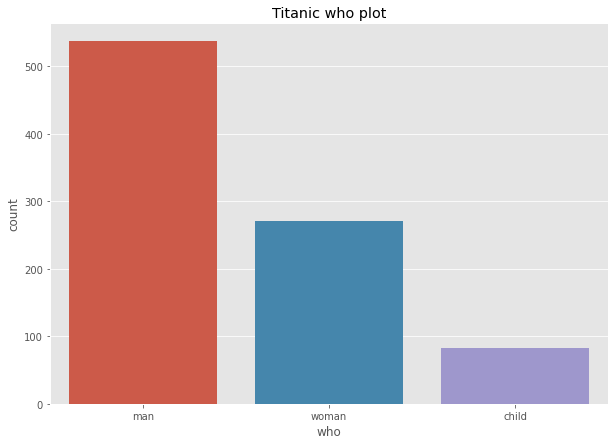

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='who' ,data=titanic)
plt.title('Titanic who plot')
plt.show()

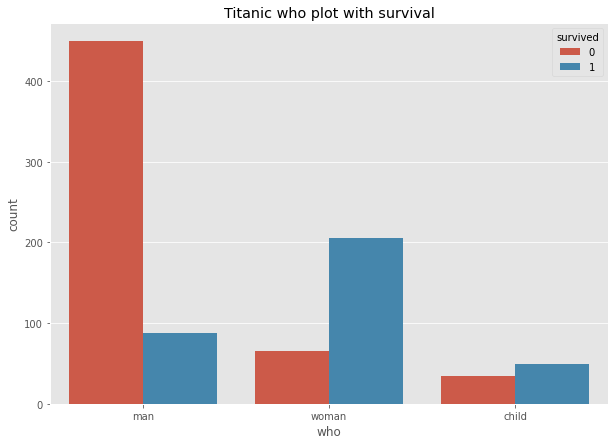

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='who' ,data=titanic, hue='survived')
plt.title('Titanic who plot with survival')
plt.show()

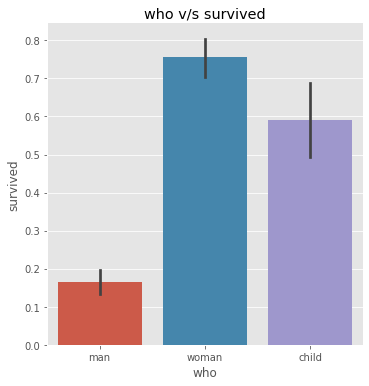

In [ ]:
sns.catplot(x='who' ,y='survived',data=titanic, kind='bar')
plt.title('who v/s survived')
plt.show()

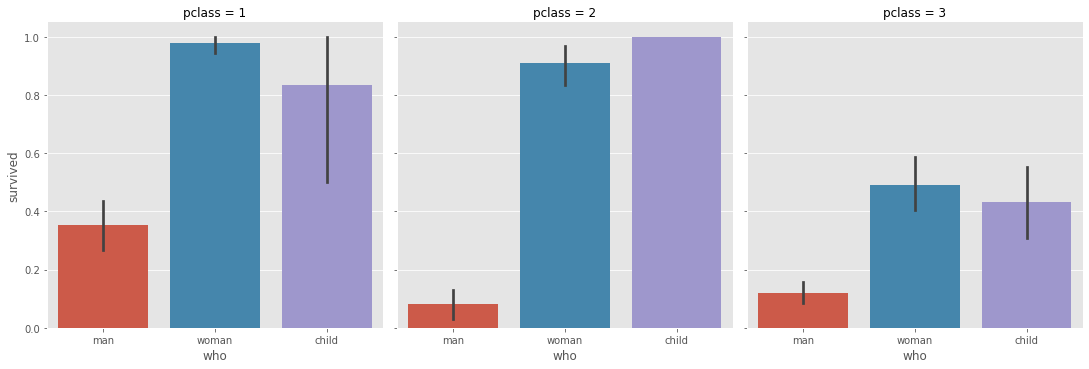

In [ ]:
sns.catplot(x='who' ,y='survived',data=titanic, kind='bar', col='pclass')
plt.show()